# <center> DROWSINESS DETECTION</center>

* **IMPORTING THE LIBRARIES** 
* **DATA AUGMNETATION**
* **DATA VISUALIZATION**
* **MODEL DECLARATION**
* **COMPILATION OF THE MODEL**
* **FIT THE MODEL**
* **EVALUATION**

# IMPORTING LIBRARIES

In [5]:
import os
from keras.preprocessing import image
import matplotlib.pyplot as plt 
import numpy as np
from keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dropout,Conv2D,Flatten,Dense, MaxPooling2D, BatchNormalization
from keras.models import load_model
import matplotlib.image as mpimg

# DATA AUGMENTATION

In [12]:
train_datagen=ImageDataGenerator ( rescale=1. /255,shear_range =0.2,zoom_range=0.2,horizontal_flip =True)
test_datagen=ImageDataGenerator ( rescale=1. /255)

In [13]:
#defining batch_size and target_shape
batch_size= 32
target_shape=(24,24)

#train dataset
train_batch= train_datagen.flow_from_directory('drowsiness dataset/dataset_new/train',shuffle=True, batch_size=batch_size,target_size=target_shape,class_mode='categorical',color_mode='grayscale')
#test dataset
valid_batch= test_datagen.flow_from_directory('drowsiness dataset/dataset_new/test',shuffle=True, batch_size=batch_size,target_size=target_shape,class_mode='categorical',color_mode='grayscale')

steps_per_epoch= len(train_batch.classes)//batch_size
validation_split = len(valid_batch.classes)//batch_size

print(steps_per_epoch,validation_split)


Found 2467 images belonging to 4 classes.
Found 433 images belonging to 4 classes.
77 13


# DATA VISUALIZATION

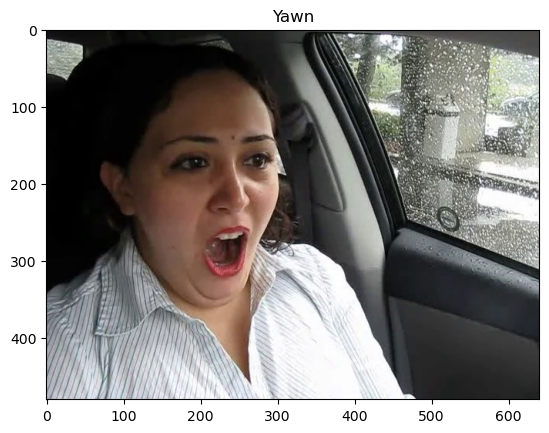

In [17]:
image1 = mpimg.imread("Drowsiness/drowsiness_dataset/dataset_new/train/yawn/107.jpg")
plt.title("Yawn")
plt.imshow(image1)

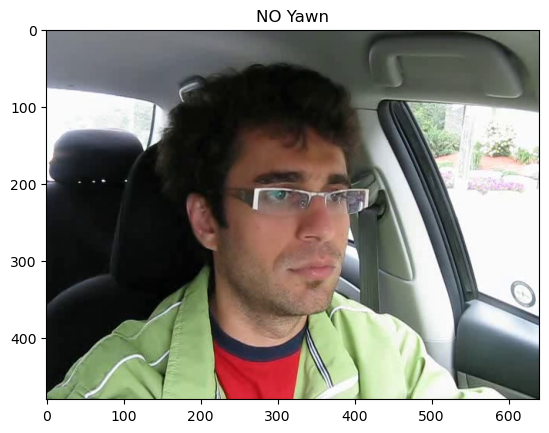

In [15]:
image2 = mpimg.imread("Drowsiness/drowsiness_dataset/dataset_new/train/no_yawn/1028.jpg")
plt.title("NO Yawn")
plt.imshow(image2)

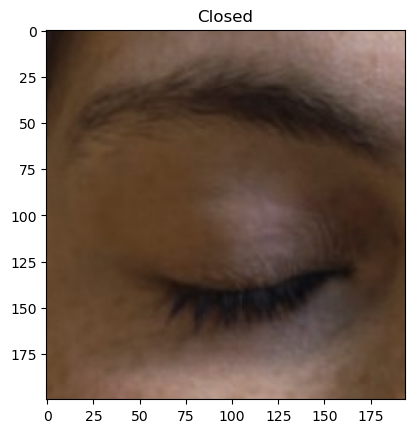

In [14]:
image3 = mpimg.imread("Drowsiness/drowsiness_dataset/dataset_new/train/Closed/_114.jpg")
plt.title("Closed")
plt.imshow(image3)

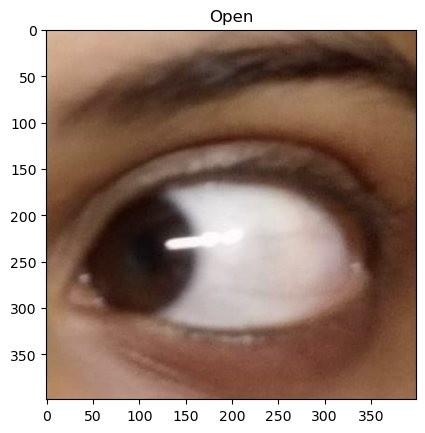

In [13]:
image4 = mpimg.imread("Drowsiness/drowsiness_dataset/dataset_new/train/Open/_110.jpg")
plt.title("Open")
plt.imshow(image4)

# MODEL DECLARATION

In [21]:
model = Sequential()

# 64 vonvolution filters used each of size 3x3
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', input_shape=(24,24,1)))
model.add(MaxPooling2D(pool_size=(1,1)))

#128 convolution filters used each of size 3x3
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))

#256 convolution filters used each of size 3x3
model.add(Conv2D(256, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(1,1)))
    
#Adding a dropout layer
model.add(Dropout(0.25))

#flatten since too many dimensions, we only want a classification output
model.add(Flatten())

#fully connected layer
model.add(Dense(128, activation='relu'))

#one more dropout for convergence 
model.add(Dropout(0.5))

#output a softmax activation function to squeeze the matrix into output probabilities
model.add(Dense(4, activation='softmax'))


In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 22, 22, 64)        640       
                                                                 
 max_pooling2d_3 (MaxPoolin  (None, 22, 22, 64)        0         
 g2D)                                                            
                                                                 
 conv2d_4 (Conv2D)           (None, 20, 20, 128)       73856     
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 20, 20, 128)       0         
 g2D)                                                            
                                                                 
 conv2d_5 (Conv2D)           (None, 18, 18, 256)       295168    
                                                                 
 max_pooling2d_5 (MaxPoolin  (None, 18, 18, 256)      

# COMPILATION OF THE MODEL

In [36]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# FIT THE MODEL

In [37]:
training=model.fit_generator(train_batch, validation_data=valid_batch,epochs=50,steps_per_epoch=steps_per_epoch ,validation_steps=validation_split)

C:\Users\melvi\AppData\Local\Temp\ipykernel_22524\2591962773.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  training=model.fit_generator(train_batch, validation_data=valid_batch,epochs=50,steps_per_epoch=steps_per_epoch ,validation_steps=validation_split)


Epoch 1/50
77/77 [==============================] - 33s 393ms/step - loss: 0.7569 - accuracy: 0.6366 - val_loss: 0.5036 - val_accuracy: 0.7668
Epoch 2/50
77/77 [==============================] - 30s 384ms/step - loss: 0.4489 - accuracy: 0.7671 - val_loss: 0.4936 - val_accuracy: 0.7572
Epoch 3/50
77/77 [==============================] - 29s 380ms/step - loss: 0.4034 - accuracy: 0.7967 - val_loss: 0.3826 - val_accuracy: 0.7957
Epoch 4/50
77/77 [==============================] - 29s 379ms/step - loss: 0.3811 - accuracy: 0.7918 - val_loss: 0.3790 - val_accuracy: 0.7764
Epoch 5/50
77/77 [==============================] - 30s 388ms/step - loss: 0.3605 - accuracy: 0.8152 - val_loss: 0.4118 - val_accuracy: 0.7788
Epoch 6/50
77/77 [==============================] - 29s 380ms/step - loss: 0.3549 - accuracy: 0.8218 - val_loss: 0.3760 - val_accuracy: 0.7981
Epoch 7/50
77/77 [==============================] - 29s 382ms/step - loss: 0.3920 - accuracy: 0.7947 - val_loss: 0.4600 - val_accuracy: 0.7668

# EVALUATION

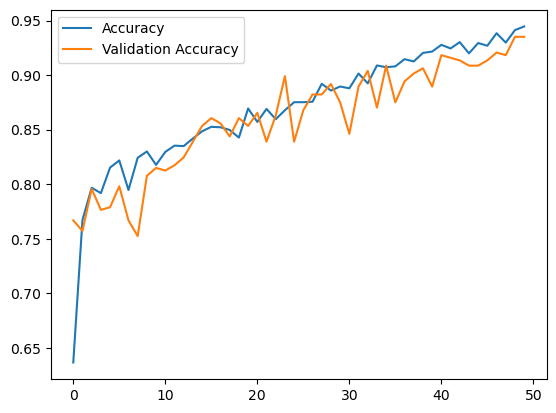

In [40]:
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.legend(['Accuracy', 'Validation Accuracy'])
plt.show()

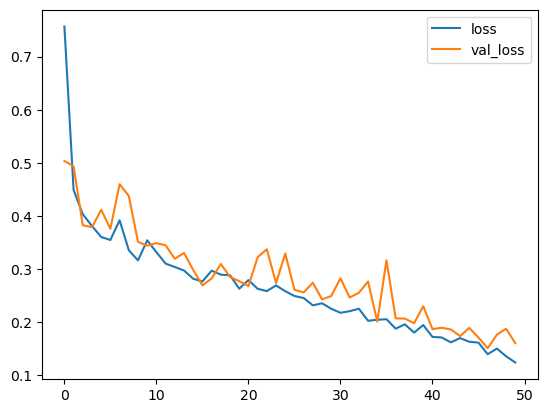

In [41]:
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.legend(['loss', 'val_loss'])
plt.show()

# SAVING THE MODEL

In [42]:
model.save('drowsy.h5', overwrite=True)

C:\Users\melvi\anaconda3\lib\site-packages\keras\src\engine\training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
